In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from validate import *

# Pandas

- built on top of Numpy array, which means they are fast
- a Data Frame is a container of Series
- all Pandas data structures are value mutable (can be changed)
- all _except_ for Series all are size mutable
  - Series is size immutable
  
I've broken up the notebook into three sections

1. Instantiation: Which simply goes over different ways to create a series or data frame object. This is purposefully basic to illustrate how there are many ways to import your data.
2. Accessing Data: Which walks through different operations you can apply on a data frame. There is no conherant big picture in this section and simply walks through some useful commands.
3. Working With A Dataset: This is the main section of this notebook. We'll be using the Titanic training dataset as a source of data to explore. Some of the python code will be provided, while other pieces will be blank and ask you to figure out how to complete each task.
4. Challenges: If you're experienced with Pandas or just want to work through problems, skip to this section.

## Table of Contents

- [Instantiation Series](#Instantiation-Series)
- [Accessing Data Series](#Accessing-Data-Series)
- [Instantiation Data Frame](#Instantiation-Data-Frame)
- [Accessing Data Data Frame](#Accessing-Data-Data-Frame)
- [Working With A Dataset](#Working-With-A-Dataset)
- [Challenges](#Challenges)

## Instantiation

The following shows different ways to create your series and data frames. If you're familiar with pandas, I suggest moving down to the `Working With A Dataset` section. However, its important to be able to easily create your objects, that way its as quick and painless to start using the full power of Pandas.

<a id='Instantiation-Series'></a>

### Series

One-dimensional ndarray with axis labels. Multiple series act as the columns that make up a data frame.

Full documentation on series available [here](https://pandas.pydata.org/pandas-docs/version/0.24/reference/series.html)

#### Creation From List

In [3]:
data = np.array(['a','b','c','d'])
series = pd.Series(data)

series

0    a
1    b
2    c
3    d
dtype: object

_Note: That the indexes are provided by default_

#### Creation From Dictionary

In [4]:
data = {'a' : 0, 'b' : 1, 'c' : 2}
series = pd.Series(data)

series

a    0
b    1
c    2
dtype: int64

In this scenario, the `key`s in our `Dictionary` act as the indicies in our newly created `Series`

<a id='Accessing-Data-Series'></a>

#### Accessing Data

Data can be accessed much like an array or list:

In [5]:
series[0]

0

Slicing works as well:

In [6]:
series[1:3]

b    1
c    2
dtype: int64

As well does accessing by key:

In [7]:
series['a']

0

There's plenty of other things we could go over, but there are better resources online for these generic topics. Check the `References` section at the end for what I used to write this, if you want to learn more or go over more examples.

<a id=Instantiation-Data-Frame></a>

### Dataframe

A data frame can be thought of as a collection of series. They are the main object you'll interact with when using Pandas.

Full documentation on data frame available [here](https://pandas.pydata.org/pandas-docs/version/0.24/reference/frame.html)

To begin working with Pandas, you'll first need to create a data frame. There are a number of ways to accomplish this:

#### Creation From A List

You can create a data frame from a list of lists to indicate the separation of rows.

In [8]:
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data)

df

,0,1
0,Alex,10
1,Bob,12
2,Clarke,13


While its not required to name the columns at creation, I'd suggest doing so like this:

In [9]:
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data, columns=["Name", "Age"])

df

,Name,Age
0,Alex,10
1,Bob,12
2,Clarke,13


If you provide the column names, pandas will store them as the headers.

#### Creation From A Dictionary

In [10]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)

df

,Age,Name
0,28,Tom
1,34,Jack
2,29,Steve
3,42,Ricky


Just like creating a series from a dictionary, you can do the same with a data frame. You can even set the indices:

In [11]:
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])

df

,Age,Name
rank1,28,Tom
rank2,34,Jack
rank3,29,Steve
rank4,42,Ricky


#### Creation From Series

You can even create a data frame from series

In [12]:
series_one = pd.Series([1, 2, 3]) 
series_two = pd.Series([4, 5, 6])

df = pd.DataFrame([series_one, series_two])

df

,0,1,2
0,1,2,3
1,4,5,6


And here's how you'd do it with column titles:

In [13]:
series_one = pd.Series([1, 2, 3]) 
series_two = pd.Series([4, 5, 6])

df = pd.DataFrame([series_one, series_two], columns=["First Column Title", "Second Column Title"])

df

,First Column Title,Second Column Title
0,NaN,NaN
1,NaN,NaN


#### From a SQL query, targeting a SQL database

The snippet of code has purposefully been set to a `raw` cell, as it will fail to run. _(I was unable to setup a SQL instance for us to play with in time)_

You can create a data frame from a SQL query. In my exampel below, I'd use `sqlalchemy` to communicate with my remote SQL database.

#### From a CSV or other flat file

One of the most frequent ways you'll load smaller amounts of data is through parsing a flat file, generally a `csv`. This is very easy to do:

In [14]:
INPUT_FILE = "train.csv"

df = pd.read_csv(INPUT_FILE)

<a id='Accessing-Data-Data-Frame'></a>

#### Accessing Data

We'll go more in depth in the section `Working With A Dataset`, but some useful commands are:

##### If-Then

Here well perform a single conditional on every row in the table and write back some value to the data frame based on that conditional. 

We could create a new dummy column that's just a bool for those who are older the 35.0

In [15]:
df.loc[df.Age > 35.0, 'Older Than 35'] = True

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Older Than 35
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


##### Selection

We can grab only rows that are of interest of us. Lets look at only individuals that survived:

In [17]:
df[(df.Survived == 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Older Than 35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,NaN
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,NaN
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,True
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S,True
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,NaN


##### Sorting By Multiple Columns

We can sort by first `Age` and then `Survival`:

In [18]:
df.sort_values(by=["Age", "Survived"], ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Older Than 35
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,NaN
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,NaN
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,NaN
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,NaN
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,NaN
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,NaN
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,NaN
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S,NaN
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S,NaN
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S,NaN


##### Working With Missing Data

Often times your dataset will not be cleaned, so you'll have to investigate which columns have missing data and decide how to handle it. Some models can accept missing data and should work as is, but often times applying a technique to these missing values _may_ increase your performance.

I often peak at `info`, as if it describes a column as `non-null`, than you know there's a value in every row:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
Older Than 35    217 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


If we had missing data, the functions `dropna`,  `fillna` and `isna` can be very useful.

##### Iterating

Sometimes you want to iterate through every row. While this generally isn't a good habbit to get into as your data size increases, you can do it:

In [20]:
for index, row in list(df.iterrows())[0:5]:
    # here we can access the rows we're interested in
    print(f"{row.Name} is {row.Age} years old")

Braund, Mr. Owen Harris is 22.0 years old
Cumings, Mrs. John Bradley (Florence Briggs Thayer) is 38.0 years old
Heikkinen, Miss. Laina is 26.0 years old
Futrelle, Mrs. Jacques Heath (Lily May Peel) is 35.0 years old
Allen, Mr. William Henry is 35.0 years old


<a id='Working-With-A-Dataset'></a>

## Working With A Dataset

This section will involve a mixture of code you can run to see how it works and challenges that will prompt you to do a specific task. I may not have explained how to do something, so give it a try and google things you don't know. Failing to answer the challenge correctly should give you a hint. Part of this section is to get you comfortable with googling something you haven't done before and generally looking at the Pandas documentation or a stack overflow post for the answer, as no one hour session will prepare you for anything.

Challenges will be denoted in bold and can be run to get a hint.

Lets recreate our dataframe by loading in the titanic training data set and walk through how we can use Pandas to interact with this data.

Lets start by creating our dataframe from our input file:

In [21]:
INPUT_FILE = "train.csv"

df = pd.read_csv(INPUT_FILE)

You should get in the habbit of inspecting your data frame as early as possible. I generally use four functions to get an idea of my data.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


This function's output should show you:

- how many rows
- how many columns
- each column's
  - name
  - whether or not they are null
  - the underlying type (sometimes Pandas can get this wrong, and you can set the column's type by looking into the `dtype` of the column)
- how much memory is used by this data frame (data frames can use upwards for four to five times the data set's size in memory)

In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This method will walk through some interesting calculations for each column. While some data sets can be to large to visualize with graphs, the `describe` method can help you visualize what the data will look like by reading the `mean`, `std` and `median` also known as the `50%` of each column.

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I generally like to look at a few rows of the data, to just see if anything jumps out at me. For example, in the past I did not realize the encoding of my `String`s for a column were completly wrong. If I were to try to do any selection or filter logic based on a `String`, I would have gotten 0 results.

Now lets generate a scatter matrix!

_Note, this might take upwards of a minute to compute on older hardware. Sorry!_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f9d79e8>,
      dtype=object)

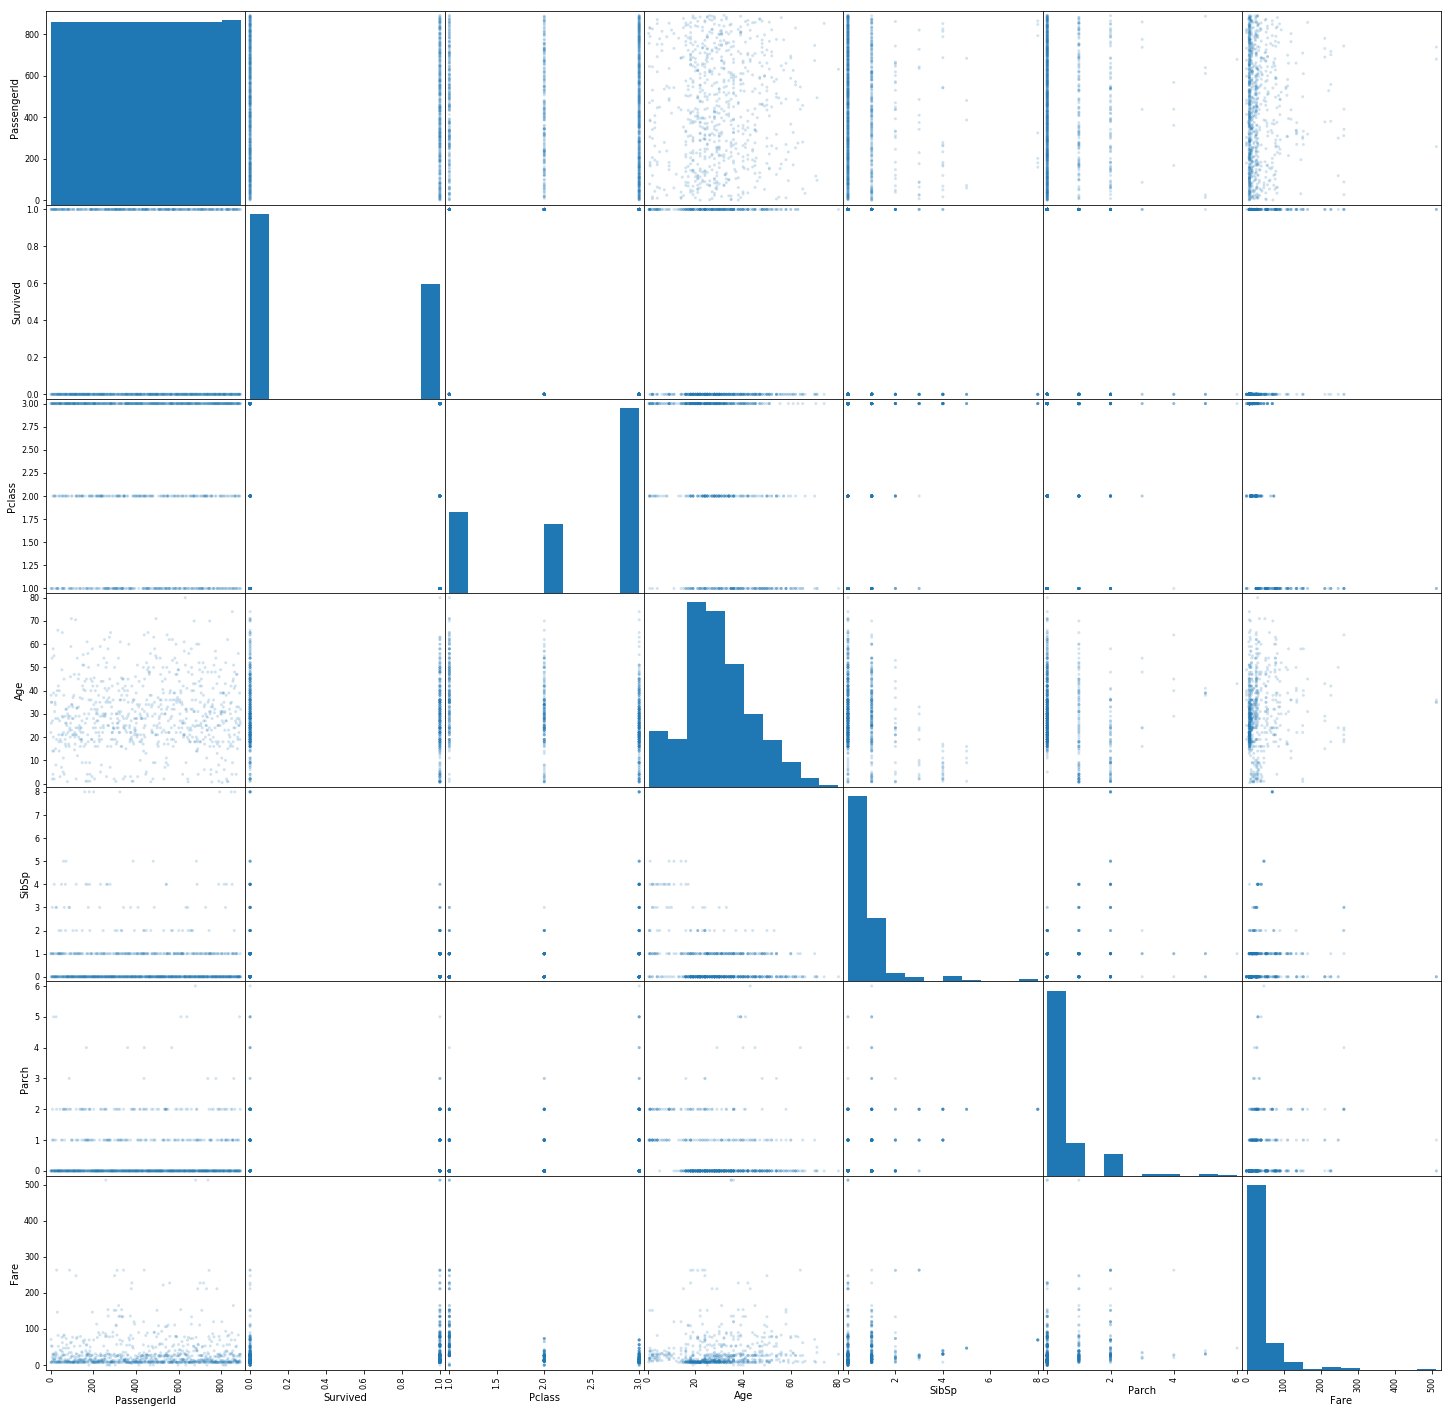

In [50]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(25, 25))

I bet some would argue how useful the above graph is, but I find it to be useful for smaller data sets. This can be a handy way for looking at every row against every other row. Note that the center is where each column meets itself, so a histogram is displayed. Each side of the histogram is just a mirror image of the other side.

The usefulness of this graph greatly depends on how many columns you have. If your working with a large dataset, I would probably recommend not even running the above command, as it can take quite a while.

_Note: we can see that hte first column is the `id` and looks evenly distributed. This type of column should **not** be in a graph like this, as any correlation to the data shoulnd't be related, as ids **should** be assigned seemingly randomly. Sometimes and `id` column can provide value, as the `id` can have some indication of when the row was added, if there wasn't any `date` like column._

After getting a general idea about the data set as a whole, I'll generally pick a few columns of interest and explore them specifically. Lets take `Pclass` as an example. Say we wanted to know the unique values in this column, instead of writing a custom python function, we can instead:

In [26]:
df.Pclass.value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

While the data represented in the output above can somewhat be understood from `info` and `describe`, getting the whole unique listing can be useful. Here we can see that `Pclass` describes which class the ticket purchaser was in and there were three classes, `1`, `2` and `3`.

<a id="Challenges"></a>

## Challenges

Below begins the challenges that you should work in a group to complete. Each challenge may have many ways to come to the conclusion, all of which _should_ be accepted. If my `validation` functions break, please let me know, as I intended for it to be as problem free as possible for an individual.

If you're stuck, simply run the cell to fell the validation and get back some hint text to help you out!

The next cell will reset the object `df`, so its the original train set. Please don't modify `df`, so you can use it for each challenge.

In [27]:
INPUT_FILE = "train.csv"

df = pd.read_csv(INPUT_FILE)

**Challenge 0: Let's start by trying to get the first row of the data frame. The type will also be a data frame**

In [28]:
first_row_of_df = None # REPLACE None WITH YOUR ANSWER

validate_first_row_of_df(first_row_of_df)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Actual:
None
Hint: There are multiple ways to do this. Look into the data frame function `head`.


**Challenge 1: Create a new data frame of all individuals that had a fare of > 30.0**

In [29]:
fare_greater_than_30_df = None # REPLACE None WITH YOUR ANSWER

validate_fare_greater_than_30(fare_greater_than_30_df)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C


Actual:
None
Hint: Make sure you're doing > 30 and not >=. Additionally look up the function `loc` and how we used it to make a conditional on age previously.


**Challenge 2: Calculate the sum of everyone's age in the data frame**

In [30]:
sum_of_everyones_age_int = None # REPLACE none WITH YOUR ANSWER

validate_everyones_age(sum_of_everyones_age_int)

expected type <class 'numpy.float64'>
actual type <class 'NoneType'>
Incorrect!
Expected:


21205.17

Actual:
None
Hint: You can either loop over every row and sum the age of each row, look into the `sum` function, look into the Pandas' `apply' function or perform a `groupby` and a `sum` aggregation. All are acceptible.


**Challenge 3: Can you do the above challenge a different way?**

In [31]:
sum_of_everyones_age_int = None # REPLACE none WITH YOUR ANSWER

validate_everyones_age(sum_of_everyones_age_int)

expected type <class 'numpy.float64'>
actual type <class 'NoneType'>
Incorrect!
Expected:


21205.17

Actual:
None
Hint: You can either loop over every row and sum the age of each row, look into the `sum` function, look into the Pandas' `apply' function or perform a `groupby` and a `sum` aggregation. All are acceptible.


**Challenge 4: Create a series of only the column `Cabin`**

In [32]:
cabin_series = None # REPLACE none WITH YOUR ANSWER

validate_only_cabin_series(cabin_series)

expected type <class 'pandas.core.series.Series'>
actual type <class 'NoneType'>
Incorrect!
Expected:


0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

Actual:
None
Hint: You should be able to access the series of the data frame either with dot notation like `df.COLUMN_NAME` or dictionary notation like `df['COLUMN_NAME']


**Challenge 5: Get the value at the first row, column `Sex`**

In [33]:
value = None # REPLACE none WITH YOUR ANSWER

validate_value_of_sex_column_first_row(value)

expected type <class 'str'>
actual type <class 'NoneType'>
Incorrect!
Expected:


'male'

Actual:
None
Hint: Look up the Pandas function `at`


**Challenge 6: What is the minimum age of the data set?**

In [34]:
min_age = None # REPLACE none WITH YOUR ANSWER

validate_min_age(min_age)

expected type <class 'numpy.float64'>
actual type <class 'NoneType'>
Incorrect!
Expected:


0.42

Actual:
None
Hint: Look into the Pandas function `min` that can be called on a Series


**Challenge 7: What is the maximum age of the data set?**

In [35]:
max_age = None # REPLACE none WITH YOUR ANSWER

validate_max_age(max_age)

expected type <class 'numpy.float64'>
actual type <class 'NoneType'>
Incorrect!
Expected:


80.0

Actual:
None
Hint: Look into the Pandas function `max` that can be called on a Series


**Challenge 8: Create a pivote table. The `Pclass` column should be your index, while the `Sex` column should be your column and the summed `Survived` column should be your value. What take aways do you have from this data?**

In [36]:
pivot_table = None # REPLACE none WITH YOUR ANSWER

validate_pivot_table_pclass_sex_survived(pivot_table)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


Sex,female,male
Pclass,,
1,91,45
2,70,17
3,72,47


Actual:
None
Hint: Look into the Pandas function `pivot_table`


**Challenge 9: Create another pivot table, like above, and just replace the summed `Survived` with mean `Fare`. What take aways do you have?**

In [37]:
pivot_table = None # REPLACE none WITH YOUR ANSWER

validate_pivot_table_pclass_sex_fare(pivot_table)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


Actual:
None
Hint: Look into the Pandas function `pivot_table`


**Challenge 10: Inverse the data frame.**

In [38]:
transposed_df = None # REPLACE none WITH YOUR ANSWER

validate_transpose(transposed_df)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22,38,26,35,35,NaN,54,2,27,14,...,33,22,28,25,39,27,19,NaN,26,32
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13,30,23.45,30,7.75


Actual:
None
Look into the Pandas function `T`


**Challenge 11: Remove the `Age` column.**

In [39]:
df_without_age = None # REPLACE none WITH YOUR ANSWER

validate_age_removed(df_without_age)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,C


Actual:
None
Look into the Pandas function `remove`. Note, this doesn't modify the dataframe by default and instead returns a new modified data frame. Also take note of the axis parameter (hint you want it to be set to 1, for columns)


**Challenge 12: Rename the `Age` column to `How Old`**

In [40]:
df_age_renamed_df = None # REPLACE none WITH YOUR ANSWER

validate_age_column_renamed_to_how_old(df_age_renamed_df)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,PassengerId,Survived,Pclass,Name,Sex,How Old,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Actual:
None
Look into the Pandas function called `rename`


**Challenge 13: Select only the bottom 5 rows**

In [41]:
last_five_rows_df = None # REPLACE none WITH YOUR ANSWER

validate_last_five_rows(last_five_rows_df)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Actual:
None
Look into the Pandas function `tail`


**Challenge 14: Select the `Age` and `Sex` column**

In [42]:
age_and_sex_columns_df = None # REPLACE none WITH YOUR ANSWER

validate_only_age_and_sex_columns(age_and_sex_columns_df)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
5,NaN,male
6,54.0,male
7,2.0,male
8,27.0,female
9,14.0,female


Actual:
None
Look into indexing into the dataframe by providing a list of rows of interest. Super duper hint: `df[['some column', 'some other column']]`


**Challenge 15: Select only Males who are older than 50 and in Pclass 3**

In [43]:
males_over_50_pclass_3 = None # REPLACE none WITH YOUR ANSWER

validate_males_over_50_in_pclass_3(males_over_50_pclass_3)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
222,223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


Actual:
None
Look into indexing the original data frame and combing conditionals with the `&` operator. This may be challenging the first time you do this. Here's an example of getting the teenages`df[(df['Age'] <= 18) & (df['Age'] >= 13)]`. Modify this to your need!


**Challenge 16: Add a new column called `Wealthy` and set it to `True` for those in `Pclass` == 3 and `False` for all others**

In [44]:
def new_wealthy_column(x):
    pass # REPLACE ME WITH SOME LOGIC AND USE THIS FUNCTION

new_df_with_wealthy_column = None # REPLACE none WITH YOUR ANSWER

validate_new_wealthy_column(new_df_with_wealthy_column)

expected type <class 'pandas.core.frame.DataFrame'>
actual type <class 'NoneType'>
Incorrect!
Expected:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Wealthy
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False


Actual:
None
Look into the `apply` function. This is an incredibly useful took to use with Pandas. I reccommend really ensuring you understand this challenge, as it will save you much time in the future.


**Challenge 17: Create a historgram of the `Age` column**

In [46]:
age_histogram = None # REPLACE none WITH YOUR ANSWER

validate_age_histogram(age_histogram)

NameError: name 'validate_age_histogram' is not defined

**Challenge 18: Create a bar plot of the `Age` column**

_Note, this might take upwards of a minute to compute on older hardware. Sorry!_

In [51]:
age_bar_plot = None # REPLACE none WITH YOUR ANSWER

validate_age_bar_plot(age_bar_plot)

NameError: name 'validate_age_bar_plot' is not defined

**Challenge 19: Create a box plot of the `Age` column**

**Challenge 20: Append the following row to the end of the data frame**

**Challenge 20: Concat the following row to the end of the data frame**

**Challenge 21: Write the data frame to a csv file**

**Challenge 22: Write the data frame to a json file**

**Challenge 23: Query the SQL lite file**

**Challenge 24: Drop all rows with at least one missing column of data**

**Challenge 25: Fill all rows with a missing colum of data with the column's mean**

## FAQs

- Q: What's the difference between a data frame and a series?
- Q: How do you iterate

## References

- https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
  - https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
  - https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook
  - http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- https://www.tutorialspoint.com/python_pandas/
- https://github.com/TiesdeKok/LearnPythonforResearch/blob/master/2_handling_data.ipynb
- https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428

## TODO

- eval
- query
- readme

Challenges
- histogram of a column
- bar plot of a column
- box plot of a column
- append
- concat
- to_csv
- to_json
- to_html
- sqllite
- dropna numerical
- fillna numerical
- isna numerical